1. Setup: Install Required Libraries

In [1]:
!pip install transformers==4.46.3

2. Import Necessary Libraries




In [2]:
import requests
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForImageTextToText


3. Load Pretrained Model and Processor

In [3]:
# Load model directly
processor = AutoProcessor.from_pretrained("unsloth/Llama-3.2-11B-Vision-Instruct-unsloth-bnb-4bit")
model = AutoModelForImageTextToText.from_pretrained("unsloth/Llama-3.2-11B-Vision-Instruct-unsloth-bnb-4bit")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/375k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

4. Show Image

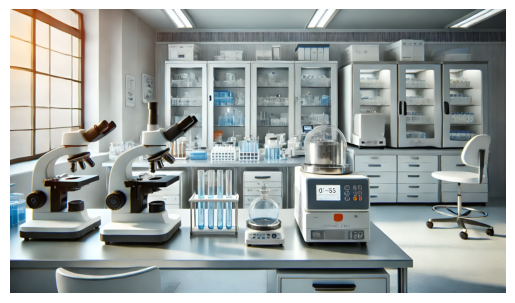

In [8]:
import matplotlib.pyplot as plt
url = "https://regalmed.ae/wp-content/uploads/2024/11/essential-of-medical-lab-equipment-1536x878.png"
# Fetch the image from the URL
image = Image.open(requests.get(url, stream=True).raw)
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes for better display
plt.show()

5-Function to Generate Response from Image and Question

In [10]:
def generate_response_from_image_and_question(image_url: str, question: str) -> str:
    """
    This function takes an image URL and a question as input, fetches the image,
    prepares the input, and uses the model to generate a descriptive or instructive response.

    Parameters:
    - image_url (str): URL of the image to be analyzed.
    - question (str): The question or instruction for the model regarding the image.

    Returns:
    - str: The generated response based on the image and question.
    """

    # Fetch the image from the provided URL
    try:
        image = Image.open(requests.get(image_url, stream=True).raw)
    except Exception as e:
        return f"Error fetching image: {str(e)}"

    # Prepare the input for the model with the question
    messages = [
        {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": question}
        ]}
    ]

    # Apply the chat template for input processing
    input_text = processor.apply_chat_template(messages, add_generation_prompt=True)

    # Prepare the image and text input for the model
    inputs = processor(image, input_text, return_tensors="pt").to(model.device)

    # Generate the output using the model
    try:
        output = model.generate(**inputs, max_new_tokens=500)
        generated_text = processor.decode(output[0], skip_special_tokens=True)
        return generated_text
    except Exception as e:
        return f"Error generating response: {str(e)}"

6.Testing Model

In [11]:
image_url = "https://regalmed.ae/wp-content/uploads/2024/11/essential-of-medical-lab-equipment-1536x878.png"
question = "Describe the tutorial feature image."

response = generate_response_from_image_and_question(image_url, question)
print(response)

user

Describe the tutorial feature image.assistant

The image depicts a laboratory setting, showcasing various scientific equipment and tools. The room is well-lit, with sunlight streaming through a window on the left side, illuminating the space.

**Key Features:**

*   **Microscopes:** Two microscopes are prominently displayed on a table in the foreground, accompanied by a microscope slide on the left side of the table.
*   **Test Tubes:** A rack of test tubes sits on the table in front of the microscopes, containing blue liquid.
*   **Equipment:** A centrifuge and a digital scale are also present on the table, along with a chair and a cabinet with drawers in the background.
*   **Shelving:** The room features a large shelving unit filled with various scientific equipment and supplies, including beakers, flasks, and other laboratory glassware.
*   **Storage Cabinets:** Additional storage cabinets are located behind the main shelving unit, providing ample space for storing equipment 

*7*.Saving Model For Deployment

In [12]:
model.save_pretrained("image_model", from_pt=True)
processor.save_pretrained("image_processor", from_pt=True)

[]